# **Lab 1.1 Image Representation**

In [1]:
import cv2
import numpy as np
import math
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import mpl_toolkits

%matplotlib inline
from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

## **Image Color Order with different libraries**
In this part, you will explore how different libraries interpret and display image colors. Specifically, you will compare Matplotlib and OpenCV libraries for image loading and display.

**Load and Display Images:**
   - Load an image using both Matplotlib `plt.imread()` and OpenCV `cv2.imread()` libraries.
   - Display the images side by side using Matplotlib.

**HINT** : `plt.imread()`,`cv2.imread()`,`fig, axs = plt.subplots(1, 2)`
<details>

<summary>
<font size="3" color="orange">
<b>Expected output</b>
</font>
</summary>

- The output should resemble this, but not be identical

![image](https://raw.githubusercontent.com/Digital-Image-Processing-Laboratory/Image-Processing-Course-2025/main/Lab1_image-representation/asset/1-1.png)


</details>

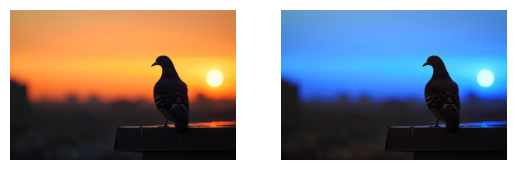

In [2]:
### START CODE HERE ###

mpl_img = plt.imread('asset/img1.jpg')
cv_img = cv2.imread('asset/img1.jpg')

fig, axs = plt.subplots(1, 2)
axs[0].imshow(mpl_img)
axs[0].axis('off')

axs[1].imshow(cv_img)
axs[1].axis('off')

plt.show()
### END CODE HERE ###

### Opencv [BGR] vs Matplotlib [RGB]
Examine the grayscale representations of individual color channels for each library.
***PLEASE use direct slicing method***

<details>

<summary>
<font size="3" color="orange">
<b>Expected output</b>
</font>
</summary>

- The output should resemble this, but not be identical

![image.png](https://raw.githubusercontent.com/Digital-Image-Processing-Laboratory/Image-Processing-Course-2025/main/Lab1_image-representation/asset/1-2.png)

</details>

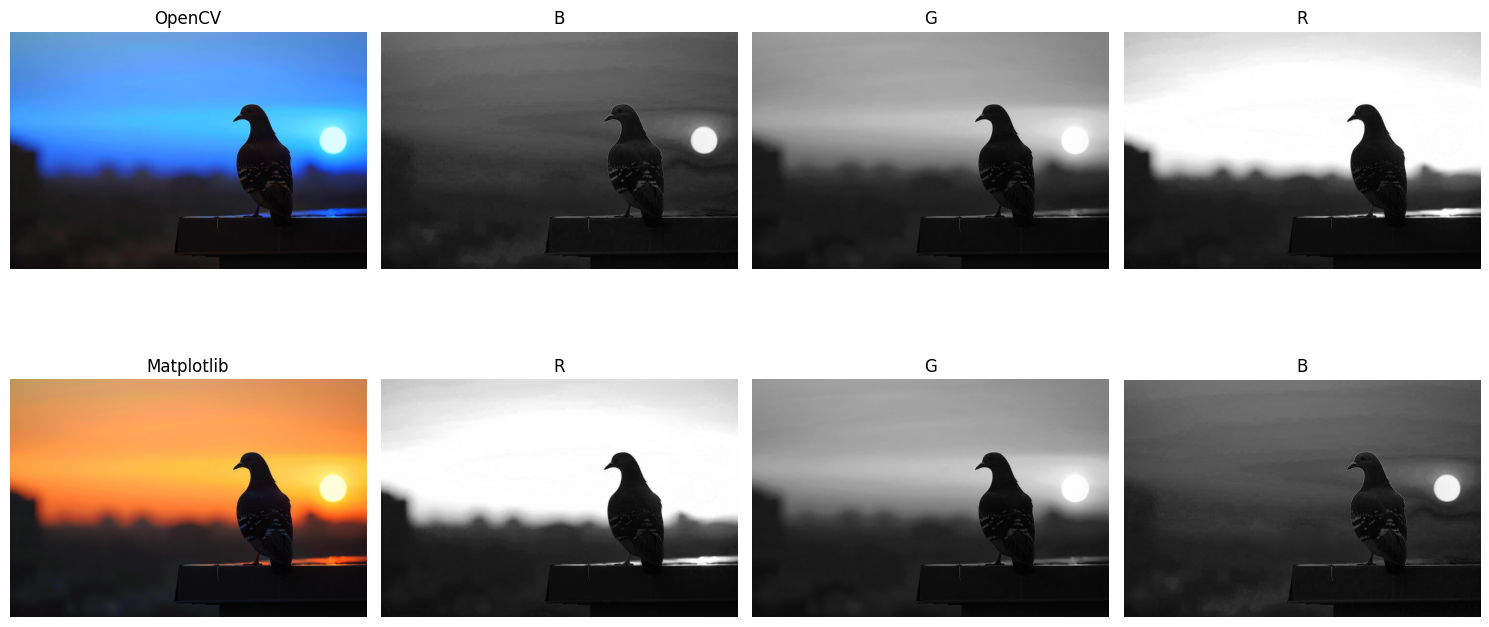

In [3]:
### START CODE HERE ###
fig, axs = plt.subplots(2, 4, figsize=(15, 8))

# OpenCV image (BGR format) - top row
axs[0][0].imshow(cv_img)
axs[0][0].set_title('OpenCV')
axs[0][0].axis('off')

# OpenCV Blue channel (index 0 in BGR)
axs[0][1].imshow(cv_img[:,:,0], cmap='gray')
axs[0][1].set_title('B')
axs[0][1].axis('off')

# OpenCV Green channel (index 1 in BGR)
axs[0][2].imshow(cv_img[:,:,1], cmap='gray')
axs[0][2].set_title('G')
axs[0][2].axis('off')

# OpenCV Red channel (index 2 in BGR)
axs[0][3].imshow(cv_img[:,:,2], cmap='gray')
axs[0][3].set_title('R')
axs[0][3].axis('off')

### Matplotlib
# Matplotlib image (RGB format) - bottom row
axs[1][0].imshow(mpl_img)
axs[1][0].set_title('Matplotlib')
axs[1][0].axis('off')

# Matplotlib Red channel (index 0 in RGB)
axs[1][1].imshow(mpl_img[:,:,0], cmap='gray')
axs[1][1].set_title('R')
axs[1][1].axis('off')

# Matplotlib Green channel (index 1 in RGB)
axs[1][2].imshow(mpl_img[:,:,1], cmap='gray')
axs[1][2].set_title('G')
axs[1][2].axis('off')

# Matplotlib Blue channel (index 2 in RGB)
axs[1][3].imshow(mpl_img[:,:,2], cmap='gray')
axs[1][3].set_title('B')
axs[1][3].axis('off')

plt.tight_layout()
plt.show()
### END CODE HERE ###

##### Opencv BGR -> RGB
Compare the images displayed after conversion using both methods (`cv2.cvtColor()` and `direct slicing`).

Use `cv2.cvtColor()`
<details>

<summary>
<font size="3" color="orange">
<b>Expected output</b>
</font>
</summary>

- The output should resemble this, but not be identical

![image-3.png](https://raw.githubusercontent.com/Digital-Image-Processing-Laboratory/Image-Processing-Course-2025/main/Lab1_image-representation/asset/1-3.png)

</details>

Text(0.5, 1.0, 'OpenCV BGR to RGB (cvtColor)')

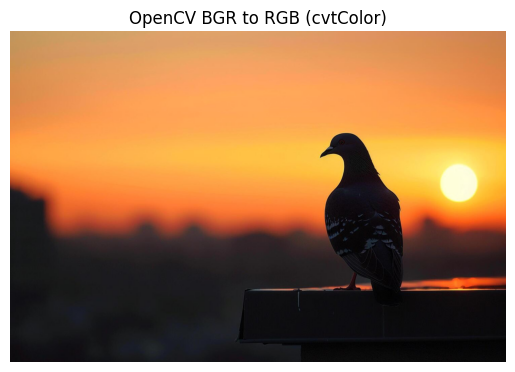

In [4]:
### START CODE HERE ###
cv2_cvt = cv2.cvtColor(cv_img, cv2.COLOR_BGR2RGB)
fig, axs = plt.subplots(1, 1)
axs.imshow(cv2_cvt)
axs.axis('off')
axs.set_title('OpenCV BGR to RGB (cvtColor)')
### END CODE HERE ###

Use `direct slicing method (array[...])`
<details>

<summary>
<font size="3" color="orange">
<b>Expected output</b>
</font>
</summary>

- The output should resemble this, but not be identical

![image-3.png](https://raw.githubusercontent.com/Digital-Image-Processing-Laboratory/Image-Processing-Course-2025/main/Lab1_image-representation/asset/1-4.png)

</details>

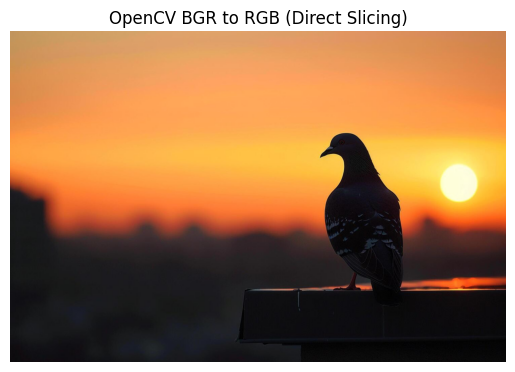

In [5]:
### START CODE HERE ###
# BGR to RGB using direct slicing - swap Red and Blue channels
cv2_slicing = cv_img[:, :, [2, 1, 0]]  # Reorder BGR to RGB
fig, axs = plt.subplots(1, 1)
axs.imshow(cv2_slicing)
axs.axis('off')
axs.set_title('OpenCV BGR to RGB (Direct Slicing)')
plt.show()
### END CODE HERE ###

## **Image Reshape**

Implement the code to tranform the image from ***channels last (HWC) to channels first (CHW)***.<br>

**NumPy Transpose**<br>
Compare the difference between :
- `np.transpose(<img>)`
- `np.transpose(<img>,(2,0,1))`

<details>

<summary>
<font size="3" color="orange">
<b>Expected output</b>
</font>
</summary>

- The output should resemble this, but not be identical
- The image display only the Red channel.

```
np.transpose(mpl_img) => Before : (3265, 4898, 3) | After : (3, 4898, 3265)
np.transpose(mpl_img,(2,0,1)) => Before : (3265, 4898, 3) | After : (3, 3265, 4898)
```

![image.png](https://raw.githubusercontent.com/Digital-Image-Processing-Laboratory/Image-Processing-Course-2025/main/Lab1_image-representation/asset/1-5.png)

</details>

np.transpose(mpl_img_color) => Before : (980, 1470, 3) | After : (3, 1470, 980)
np.transpose(mpl_img_color, (2,0,1)) => Before : (980, 1470, 3) | After : (3, 980, 1470)


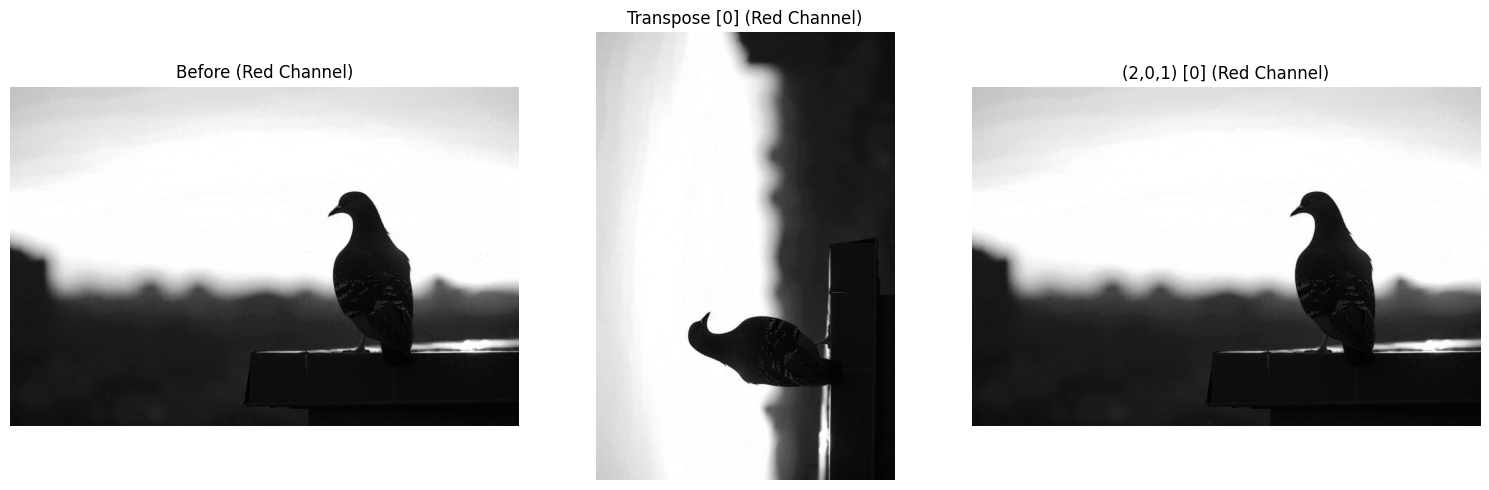

In [6]:
### START CODE HERE ###
# Reload the original color image for transpose operations
mpl_img = plt.imread('asset/img1.jpg')

reshaped_trade_trans = np.transpose(mpl_img)
print('np.transpose(mpl_img_color) => Before :', mpl_img.shape, '| After :', reshaped_trade_trans.shape)

reshaped_trans = np.transpose(mpl_img, (2, 0, 1))
print('np.transpose(mpl_img_color, (2,0,1)) => Before :', mpl_img.shape, '| After :', reshaped_trans.shape)

fig, axs = plt.subplots(1, 3, figsize=(15, 5))

# Original image (show only Red channel for consistency with expected output)
axs[0].imshow(mpl_img[:,:,0], cmap='gray')
axs[0].set_title('Before (Red Channel)')
axs[0].axis('off')

axs[1].imshow(reshaped_trade_trans[0], cmap='gray')
axs[1].set_title('Transpose [0] (Red Channel)')
axs[1].axis('off')

axs[2].imshow(reshaped_trans[0], cmap='gray')
axs[2].set_title('(2,0,1) [0] (Red Channel)')
axs[2].axis('off')

plt.tight_layout()
plt.show()
### END CODE HERE ###

If you code work properly, the cell below should run without error.

In [7]:
assert reshaped_trade_trans.shape == (mpl_img.shape[2], mpl_img.shape[1], mpl_img.shape[0]), \
    f"Error: Shape mismatch after traditional transpose. Expected {(mpl_img.shape[1], mpl_img.shape[0], mpl_img.shape[2])}, got {reshaped_trade_trans.shape}"
print("Assertion for traditional transpose passed successfully.")

assert reshaped_trans.shape == (mpl_img.shape[2], mpl_img.shape[0], mpl_img.shape[1]), \
    f"Error: Shape mismatch after specified transpose. Expected {(mpl_img.shape[2], mpl_img.shape[0], mpl_img.shape[1])}, got {reshaped_trans.shape}"
print("Assertion for specified transpose passed successfully.")

Assertion for traditional transpose passed successfully.
Assertion for specified transpose passed successfully.


**NumPy Reshape**

Use `np.reshape()`. Ensure the new shape is (3, height, width).
<details>

<summary>
<font size="3" color="orange">
<b>Expected output</b>
</font>
</summary>

- The output should resemble this, but not be identical
- The image display only the Red channel.

```
Before : (3265, 4898, 3) | After : (3, 3265, 4898)
```

![image.png](https://raw.githubusercontent.com/Digital-Image-Processing-Laboratory/Image-Processing-Course-2025/main/Lab1_image-representation/asset/1-6.png)

</details>

Before : (980, 1470, 3) | After : (3, 980, 1470)


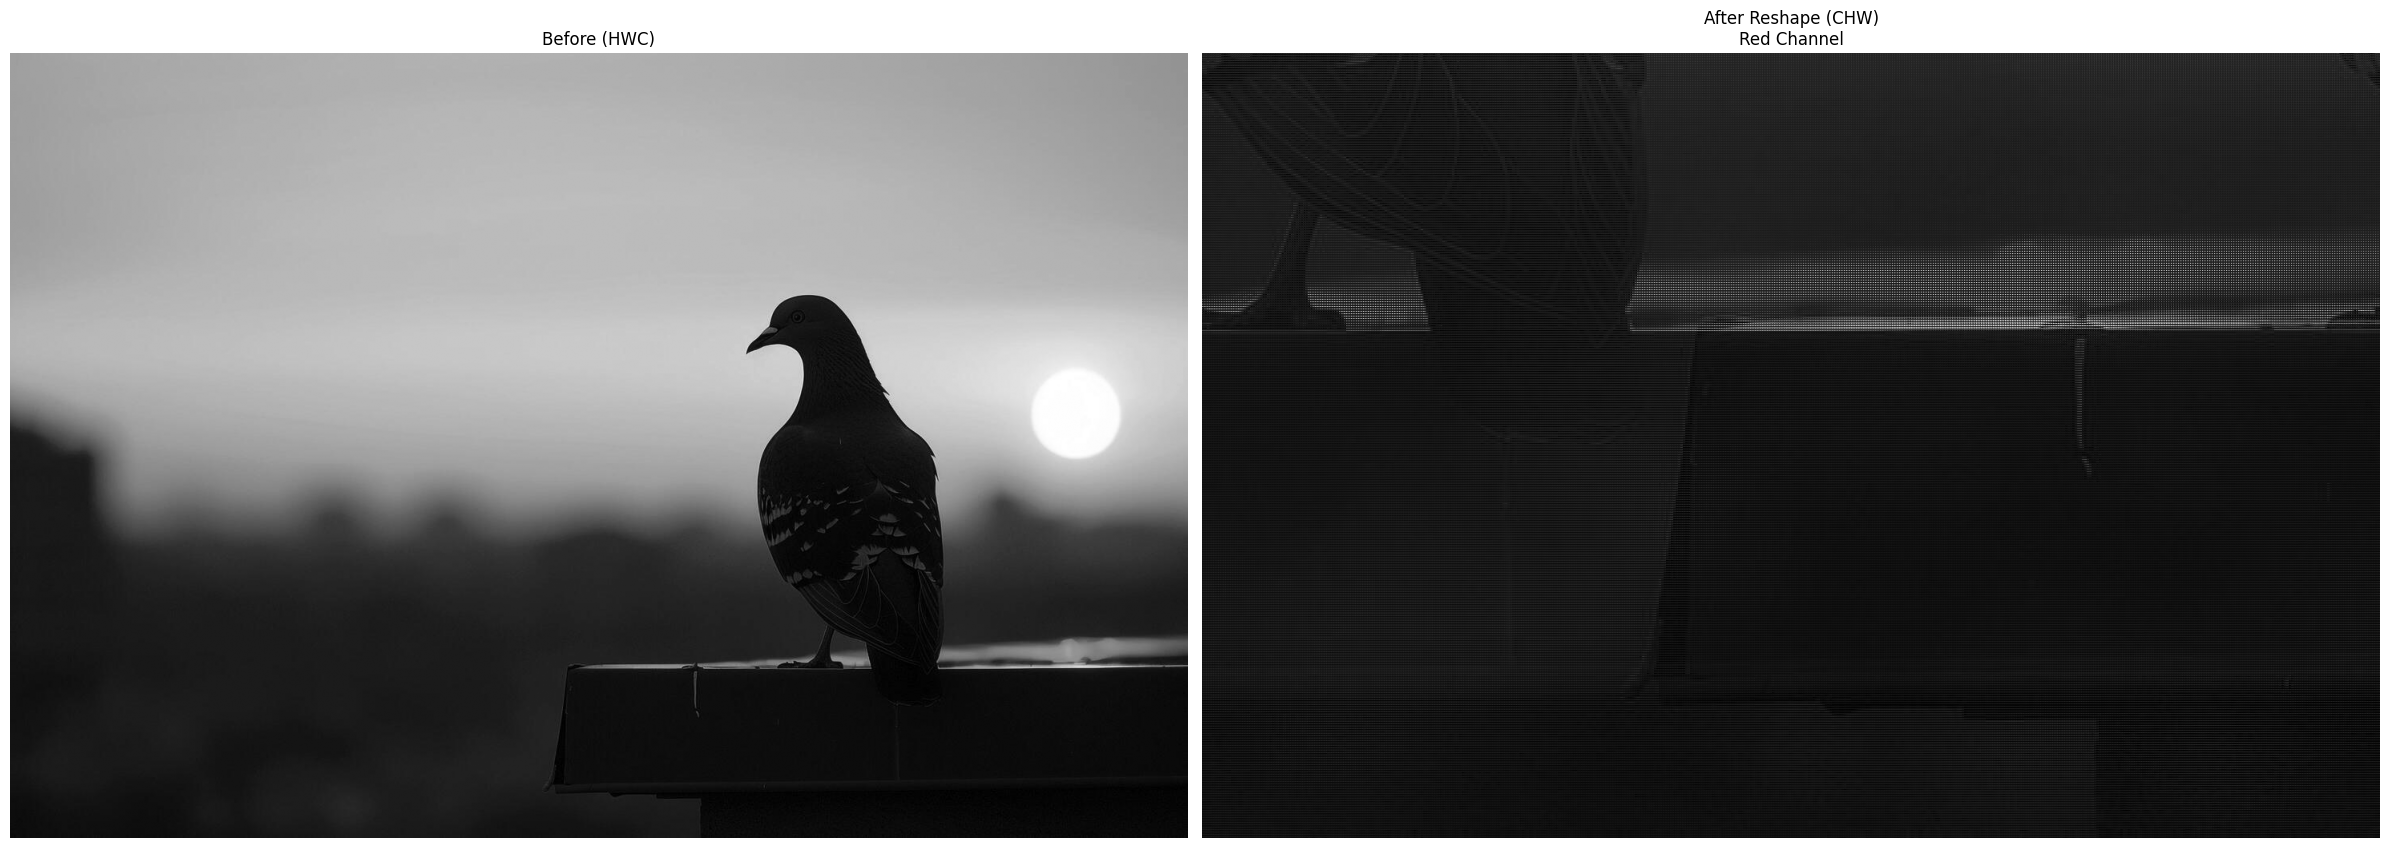

In [8]:
### START CODE HERE ###
mpl_img_gray = cv2.cvtColor(mpl_img, cv2.COLOR_RGB2GRAY)  # Convert to grayscale
reshaped_reshape = np.reshape(mpl_img, (mpl_img.shape[2], mpl_img.shape[0], mpl_img.shape[1]))
print('Before :',mpl_img.shape,'| After :',reshaped_reshape.shape)

fig, axs = plt.subplots(1, 2, figsize=(24, 12))
axs[0].imshow(mpl_img_gray, cmap='gray')
axs[0].set_title('Before (HWC)')
axs[0].axis('off')

axs[1].imshow(reshaped_reshape[2], cmap='gray')
axs[1].set_title('After Reshape (CHW)\nRed Channel')
axs[1].axis('off')

plt.tight_layout()
plt.show()
### END CODE HERE ###

If you code work properly, the cell below should run without error.

In [9]:
assert reshaped_reshape.shape == (mpl_img.shape[2], mpl_img.shape[0], mpl_img.shape[1]), \
    f"Error: Shape mismatch after reshape. Expected {(mpl_img.shape[2], mpl_img.shape[0], mpl_img.shape[1])}, got {reshaped_reshape.shape}"
print("Assertion for reshape passed successfully.")

Assertion for reshape passed successfully.


**NumPy moveaxis**

Use `np.moveaxis` to move the channels axis from the last position to the first.
<details>

<summary>
<font size="3" color="orange">
<b>Expected output</b>
</font>
</summary>

- The output should resemble this, but not be identical
- The image display only the Red channel.

```
Before : (3265, 4898, 3) | After : (3, 3265, 4898)
```

![image.png](https://raw.githubusercontent.com/Digital-Image-Processing-Laboratory/Image-Processing-Course-2025/main/Lab1_image-representation/asset/1-7.png)

</details>

(np.float64(-0.5), np.float64(1469.5), np.float64(979.5), np.float64(-0.5))

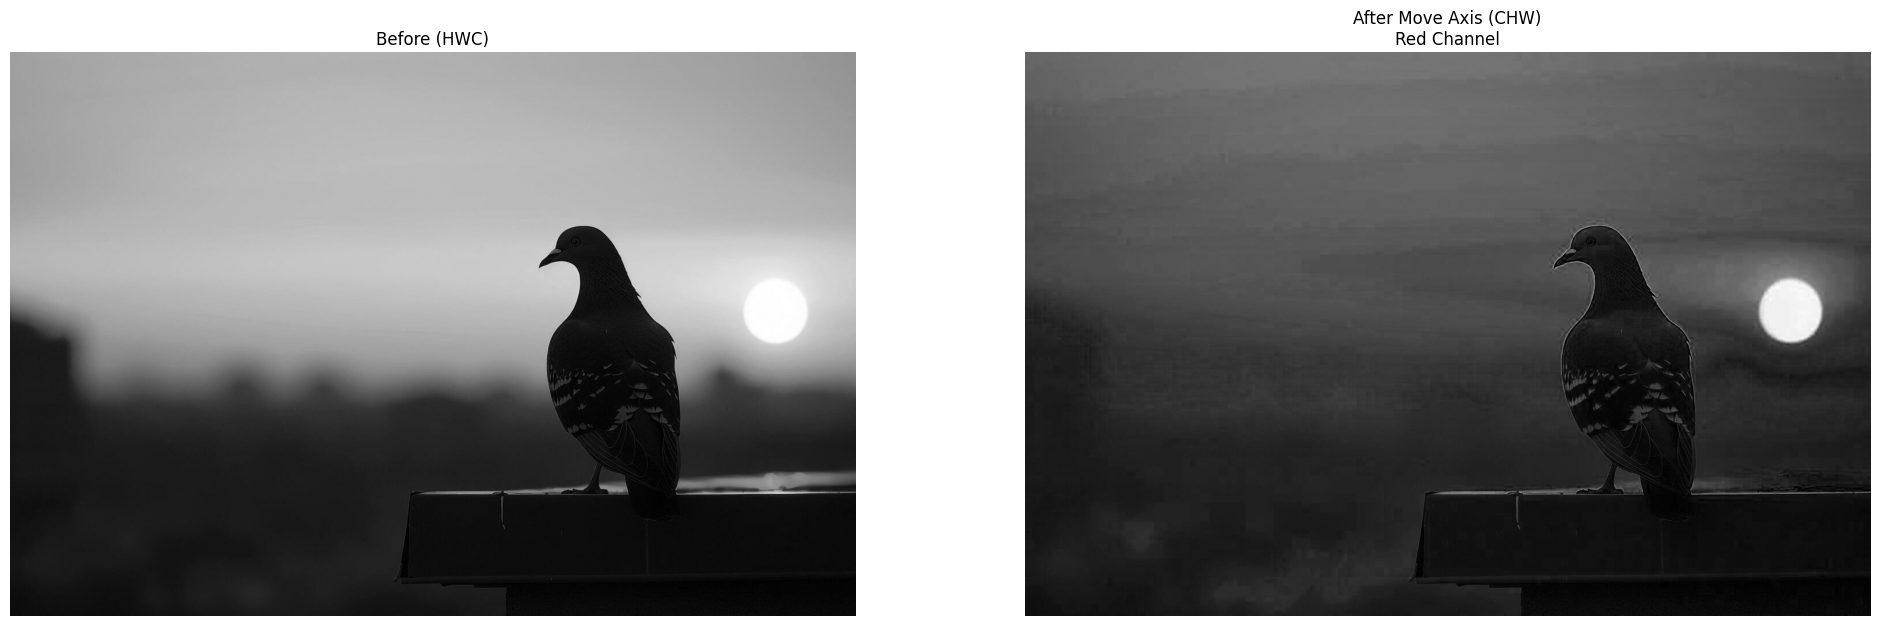

In [10]:
### START CODE HERE ###
reshaped_mvx = np.moveaxis(mpl_img, -1, 0)

fig, axs = plt.subplots(1, 2, figsize=(24, 12))
axs[0].imshow(mpl_img_gray, cmap='gray')
axs[0].set_title('Before (HWC)')
axs[0].axis('off')

axs[1].imshow(reshaped_mvx[2], cmap='gray')
axs[1].set_title('After Move Axis (CHW)\nRed Channel')
axs[1].axis('off')




### END CODE HERE ###

If you code work properly, the cell below should run without error.

In [11]:
assert reshaped_mvx.shape == (mpl_img.shape[2], mpl_img.shape[0], mpl_img.shape[1]), \
    f"Error: Shape mismatch after np.moveaxis. Expected {(mpl_img.shape[2], mpl_img.shape[0], mpl_img.shape[1])}, got {reshaped_mvx.shape}"
print("Assertion for np.moveaxis passed successfully.")

Assertion for np.moveaxis passed successfully.


## **Reduce Bit Depth using Quantization**
In this part, you will explore how to reduce the bit depth of an image using quantization. Quantization is a technique used to map pixel values from a continuous range to a smaller set of discrete values, effectively reducing the number of bits used to represent each pixel.
$$
\begin{align*}
Q_{level} &= 2^{bit dept-1}\\
Q &= floor(NormValue(S_i) * Q_{level})\\
Q &= floor((\frac{S_i-S_{min}}{S_{max}-S_{min}})*Q_{level})
\end{align*}
$$

Please complete the function below.

<details>

<summary>
<font size="3" color="orange">
<b>Expected output</b>
</font>
</summary>

- The output should resemble this, but not be identical

![image.png](https://raw.githubusercontent.com/Digital-Image-Processing-Laboratory/Image-Processing-Course-2025/main/Lab1_image-representation/asset/1-8.png)

</details>

In [16]:
### START CODE HERE ###
def quantize(img, bit_dept):
    """
    Quantize the image to a specified bit depth.
    
    Parameters:
    img (numpy.ndarray): Input image.
    bit_dept (int): Bit depth for quantization.
    
    Returns:
    numpy.ndarray: Quantized image.
    """
    q_level = 2 ** bit_dept - 1
    
    # Normalize the image to [0, 1] range
    s_min = np.min(img)
    s_max = np.max(img)
    normalized_img = (img - s_min) / (s_max - s_min)
    
    # Apply quantization formula: floor(NormValue * Q_level)
    quantized_img = np.floor(normalized_img * q_level)
    
    return quantized_img
### END CODE HERE ###

(np.float64(-0.5), np.float64(1469.5), np.float64(979.5), np.float64(-0.5))

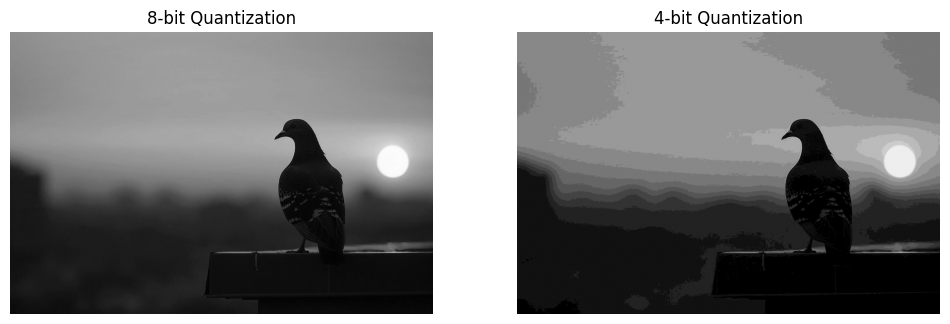

In [17]:
### START CODE HERE ###
gray_img = cv2.cvtColor(cv_img, cv2.COLOR_RGB2GRAY)
bd8 = quantize(gray_img, 8)
bd4 = quantize(gray_img, 4)

fig, axs = plt.subplots(1, 2, figsize=(12, 6))
axs[0].imshow(bd8, cmap='gray')
axs[0].set_title('8-bit Quantization')
axs[0].axis('off')

axs[1].imshow(bd4, cmap='gray')
axs[1].set_title('4-bit Quantization')
axs[1].axis('off')
### END CODE HERE ###

If you code work properly, the cell below should run without error.

In [18]:
max_value_bd8 = 2**8 - 1
max_value_bd4 = 2**4 - 1

assert np.min(bd8) >= 0 and np.max(bd8) <= max_value_bd8, \
    f"Error: Values in bd8 are out of expected range 0-{max_value_bd8}. Got min={np.min(bd8)}, max={np.max(bd8)}"
assert np.min(bd4) >= 0 and np.max(bd4) <= max_value_bd4, \
    f"Error: Values in bd4 are out of expected range 0-{max_value_bd4}. Got min={np.min(bd4)}, max={np.max(bd4)}"


## **3D Image Surface**

use `plot_surface()` to plot the image in 3D space, where the z-axis represents the normalized pixel intensity values.

<details>

<summary>
<font size="3" color="orange">
<b>Expected output</b>
</font>
</summary>

- The output should resemble this, but not be identical

![3d-surface.gif](https://raw.githubusercontent.com/Digital-Image-Processing-Laboratory/Image-Processing-Course-2025/main/Lab1_image-representation/asset/3d-surface.gif)

</details>

In [19]:
# Install plotly if needed
%pip install plotly
import plotly.graph_objects as go
import plotly.offline as pyo

### START CODE HERE ###
cv_img_gray = cv2.cvtColor(cv_img, cv2.COLOR_BGR2GRAY)

# Downsample the full image for better performance (use every 10th pixel)
step = 10
cv_img_downsampled = cv_img_gray[::step, ::step]

# Create meshgrid for the downsampled image
X = np.arange(cv_img_downsampled.shape[1])
Y = np.arange(cv_img_downsampled.shape[0])
X, Y = np.meshgrid(X, Y)

Z = cv_img_downsampled / 255.0

# Create interactive 3D surface plot with plotly
fig = go.Figure(data=[go.Surface(z=Z, x=X, y=Y, colorscale='viridis')])
fig.update_layout(
    title='3D Surface Plot of Full Grayscale Image (Interactive)',
    scene=dict(
        xaxis_title='X (downsampled)',
        yaxis_title='Y (downsampled)',
        zaxis_title='Intensity'
    ),
    width=800,
    height=600
)
fig.show()
### END CODE HERE ###

Note: you may need to restart the kernel to use updated packages.


---

## **Question**
1. How to perform manual color conversion (using only array slicing) of image array read from openCV (BGR) to RGB?
2. How to perform manual conversion (using only array slicing) of image array from channel last to channel first?
3. Why does np.reshape destroy the image integrity?